In [1]:
import os
import sys
sys.path.extend([".", ".."])
import orjson
from nebula import JSONTokenizer, PEDynamicFeatureExtractor
from nebula.misc import getRealPath, flattenList

PATH = getRealPath(type="notebook")
ROOT = PATH + r"\.."
TRAINSET = ROOT + r"\data\data_raw\windows_emulationDataset"
#TRAINSET = ROOT + r"\data\data_filtered\speakeasy_trainset"

subFolders = [x for x in os.listdir(TRAINSET) if x.startswith("report_")]
benignFolders = ["report_clean", "report_windows_syswow64"]

LIMIT = 100

speakeasyConfig = r"C:\Users\dtrizna\Code\nebula\emulation\_speakeasyConfig.json"
extractor = PEDynamicFeatureExtractor(speakeasyConfig=speakeasyConfig)

events = []
for subFolder in subFolders:
    fullPath = f"{TRAINSET}\\{subFolder}"
    files = [f"{fullPath}\\{x}" for x in os.listdir(fullPath) if x.endswith(".json")][:LIMIT]
    
    l = len(files)
    for i,file in enumerate(files):
        print(f"{subFolder:>20}: {i+1}/{l} {' '*30}", end="\r")
        with open(file, "r") as f:
            #reportEntryPoints = orjson.loads(f.read())
            jsonEventRecords = orjson.loads(f.read())

        # for PE path or PE bytes you can use
        #jsonEventRecords = extractor.emulate(path=path)
        #jsonEventRecords = extractor.emulate(data=bytez)

        # for entry_points from json report use
        # ~1 sec for 100 events
        jsonEventRecords = extractor.parseReportEntryPoints(jsonEventRecords)
        
        events.append(jsonEventRecords)
    print()

     report_backdoor: 10/10                               
        report_clean: 10/10                               
    report_coinminer: 10/10                               
      report_dropper: 10/10                               
    report_keylogger: 10/10                               
   report_ransomware: 10/10                               
          report_rat: 10/10                               
       report_trojan: 10/10                               
report_windows_syswow64: 10/10                               


In [9]:
recordDict = events[0]
RETURN_VALUES_TOKEEP = ['0x1', '0x0', '0xfeee0001', '0x46f0', '0x77000000', '0x4690', '0x90', '0x100', '0xfeee0004', '0x6', '0x10c', '-0x1', '0xfeee0002', '0xfeee0000', '0x54', '0x3', '0x10', '0xfeee0005', '0x2', '0xfeee0003', '0x7d90', '0xfeee0006', '0x4610', '0x45f0', '0x20', '0xffffffff', '0x4e4', '0x8810', '0x7e70', '0x7', '0x7000', '0xc000', '0xfeee0007', '0xcd', '0xf002', '0xf001', '0xf003', '0xfeee0008', '0xfeee0009', '0xfeee000b', '0xfeee000a', '0xfeee000c', '0xfeee0014', '0x47b0', '0xfeee000e', '0xfeee000d', '0xfeee000f', '0xfeee0015', '0xfeee0016', '0xfeee0010', '0xfeee0011', '0xfeee0013', '0xfeee0012', '0x4', '0xfeee0017', '0xfeee0018', '0xfeee0019', '0x8000', '0x7ec0', '0x400000', '0x1db10106', '0xfeee001a', '0xfeee001c', '0xfeee001b', '0x102', '0x5', '0xfeee0071', '0x8', '0x5265c14', '0x9000', '0x7de0', '0xc', '0x14', '0xfeee001d', '0x46d0', '0xfeee001e', '0xfeee001f', '0xfeee0020', '0x50000', '0xe', '0x8cc0', '0x4012ac', '0x12', '0xfeee0040', '0xfeee0022', '0xfeee0021', '0xfeee0023', '0xfeee0024', '0xfeee0025', '0x77d10000', '0xfeee0027', '0x2a', '0xfeee0026', '0x2c', '0xfeee007e', '0xfeee005d', '0xfeee0028', '0x78000000', '0x2e', '0xfeee007c']
recordDict['apis']['ret_val'][~recordDict['apis']['ret_val'].isin(RETURN_VALUES_TOKEEP)] = "<ret_val>"
recordDict['apis']['ret_val']

0      <ret_val>
1      <ret_val>
2      <ret_val>
3      0x5265c14
4            0x1
         ...    
485    <ret_val>
486    <ret_val>
487    <ret_val>
488          0x1
489    <ret_val>
Name: ret_val, Length: 490, dtype: object

In [18]:
VOCAB_SIZE = 1000

tokenizer = JSONTokenizer()

# takes ~50s for 91k events
eventsTokenized = tokenizer.tokenize(events)
tokenizer.buildVocab(eventsTokenized, vocabSize=VOCAB_SIZE)

if not LIMIT:
    file = f"speakeasyVocabTrainset_{VOCAB_SIZE}.pkl"
    print("Dumping vocab to {}".format(file))
    tokenizer.dumpVocab(file)
_ = tokenizer.convertTokenListToIds(eventsTokenized[0:3])

In [19]:
#print(tokenizer.vocab)
print(len(tokenizer.vocab))
print(tokenizer.vocabSize)
print(VOCAB_SIZE)

1000
1000
1000


In [20]:
tokenizer.counter.most_common(tokenizer.vocabSize)[-50:]

[('0xfeee00cc', 86),
 ('0xfeee00cd', 86),
 ('0xfeee00ce', 86),
 ('0xfeee00cf', 86),
 ('kernel32.getwindowsdirectorya', 86),
 ('user32.getclassinfoa', 86),
 ('0x4960', 86),
 ('0xcb000', 86),
 ('0x76500000', 86),
 ('kernel32.getconsolewindow', 85),
 ('0x400', 85),
 ('0x7ee8', 85),
 ('0x7eed', 85),
 ('0x104', 84),
 ('shell32.shellexecutea', 84),
 ('ntdll.ldrgetprocedureaddress', 84),
 ('0x4093e9', 84),
 ('0x4093ea', 84),
 ('0x4093eb', 84),
 ('0x4093ec', 84),
 ('0x7540', 83),
 ('0x1b', 83),
 ('0x61', 83),
 ('0xf', 83),
 ('kernel32.interlockedcompareexchange', 83),
 ('0x4a40', 82),
 ('0xb0', 82),
 ('api-ms-win-crt-heap-l1-1-0.malloc', 82),
 ('0x3fb000', 82),
 ('msvcrt.exit', 81),
 ('kernel32.initializeconditionvariable', 81),
 ('msvcrt._ismbblead', 81),
 ('0x4275a0', 80),
 ('0x4254f0', 80),
 ('0x4a80', 80),
 ('kernel32.arefileapisansi', 79),
 ('0x3f5000', 79),
 ('kernel32.heapdestroy', 79),
 ('0x16000', 78),
 ('0x437117', 78),
 ('0x3f7000', 78),
 ('0x3f8000', 78),
 ('0x3f9000', 78),
 ('0x3f

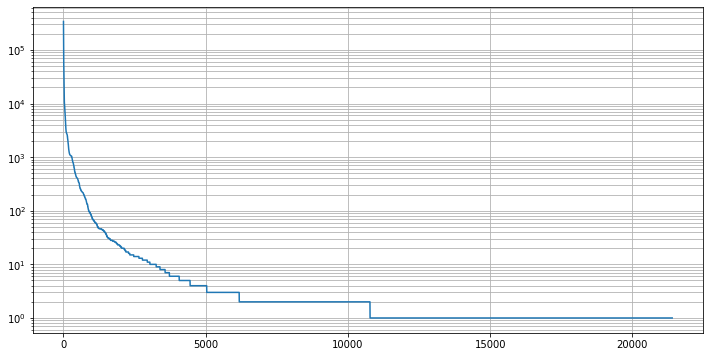

In [21]:
def plotCounterCountsLineplot(counter):
    import matplotlib.pyplot as plt
    import numpy as np
    counts = [x[1] for x in counter.most_common()]
    
    plt.figure(figsize=(12,6))
    plt.plot(np.arange(len(counts)), counts)
    plt.yscale("log")
    # add ticks and grid to plot
    plt.grid(which="both")
    plt.show()
plotCounterCountsLineplot(tokenizer.counter)

In [22]:
registry_events = [x for x in eventsTokenized if "registry_access" in x]
len(registry_events)

852

In [23]:
MAX_SEQ_LEN = 2048

# encode raw events
eventsEncodedPadded = tokenizer.encode(events, maxLen=MAX_SEQ_LEN)
eventsEncodedPadded.shape

(8300, 2048)

In [24]:
# if already tokenized
eventsEncoded = tokenizer.convertTokenListToIds(eventsTokenized)
eventsEncodedPadded = tokenizer.padSequenceList(eventsEncoded, maxLen=MAX_SEQ_LEN)
eventsEncodedPadded.shape

(8300, 2048)

In [25]:
TOP_RET_VALS = 100
print([x[0] for x in sorted([(x,tokenizer.counter[x]) for x in tokenizer.counter if "0x" in x], key=lambda x: x[1], reverse=True)[0:TOP_RET_VALS]])

['0x1', '0x0', '0xfeee0001', '0x46f0', '0x77000000', '0x4690', '0x90', '0x100', '0xfeee0004', '0x6', '0x10c', '-0x1', '0xfeee0002', '0xfeee0000', '0x54', '0x3', '0x10', '0xfeee0005', '0x2', '0xfeee0003', '0x7d90', '0xfeee0006', '0x4610', '0x45f0', '0x20', '0xffffffff', '0x4e4', '0x8810', '0x7e70', '0x7', '0x7000', '0xc000', '0xfeee0007', '0xcd', '0xf002', '0xf001', '0xf003', '0xfeee0008', '0xfeee0009', '0xfeee000b', '0xfeee000a', '0xfeee000c', '0xfeee0014', '0x47b0', '0xfeee000e', '0xfeee000d', '0xfeee000f', '0xfeee0015', '0xfeee0016', '0xfeee0010', '0xfeee0011', '0xfeee0013', '0xfeee0012', '0x4', '0xfeee0017', '0xfeee0018', '0xfeee0019', '0x8000', '0x7ec0', '0x400000', '0x1db10106', '0xfeee001a', '0xfeee001c', '0xfeee001b', '0x102', '0x5', '0xfeee0071', '0x8', '0x5265c14', '0x9000', '0x7de0', '0xc', '0x14', '0xfeee001d', '0x46d0', '0xfeee001e', '0xfeee001f', '0xfeee0020', '0x50000', '0xe', '0x8cc0', '0x4012ac', '0x12', '0xfeee0040', '0xfeee0022', '0xfeee0021', '0xfeee0023', '0xfeee002